In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [4]:
df = pd.read_csv("/content/sample_data/test.csv")
pd.set_option('display.max_columns',None)
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,00:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,01:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,00:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,03:22,05:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [5]:
df.shape

(5000, 18)

In [ ]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [ ]:
df.drop(columns=['Flight_ID','Airline','Departure_City','Aircraft_Type',],inplace=True)

In [ ]:
print(f'>Now the shape of the data frame is {df.shape[0]} rows and {df.shape[1]}columns.')

>Now the shape of the data frame is 5000 rows and 14columns.


In [ ]:
df.head(2)

,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,Moorebury,3096.0,18:43,00:14,5.52,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,Camachoberg,8760.0,01:16,13:04,11.80,1,Thursday,April,None,High,Clear,295,Discount,1.05


In [ ]:
df.isnull().sum()

Arrival_City          30
Distance               9
Departure_Time         0
Arrival_Time           0
Duration               0
Number_of_Stops        0
Day_of_Week           25
Month_of_Travel       34
Holiday_Season         0
Demand                34
Weather_Conditions    49
Passenger_Count        0
Promotion_Type        49
Fuel_Price            10
dtype: int64

In [ ]:
pd.DataFrame(df.isna().mean()*100).T

,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,0.6,0.18,0.0,0.0,0.0,0.0,0.5,0.68,0.0,0.68,0.98,0.0,0.98,0.2


In [ ]:
df['Distance'].fillna(df['Distance'].mean(), inplace=True)
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)  # Use mode for categorical
df['Demand'].fillna(df['Demand'].mode(), inplace=True)
df['Fuel_Price'].fillna(df['Fuel_Price'].mean(), inplace=True)

# Fill missing values for categorical variables with mode
df['Arrival_City'].fillna(df['Arrival_City'].mode()[0], inplace=True)
df['Promotion_Type'].fillna(df['Promotion_Type'].mode()[0], inplace=True)
df['Demand'].fillna(df['Demand'].mode(),inplace=True)

In [ ]:
df=df.fillna({'Demand':st.mode(df['Demand'])})
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)  # Use mode for categorical
df['Month_of_Travel'].fillna(df['Month_of_Travel'].mode()[0], inplace=True)  # Use mode for categorical
df.isnull().sum()

Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [ ]:
df.dtypes

Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
dtype: object

In [ ]:
df.head()

,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,Moorebury,3096.0,18:43,00:14,5.52,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,Camachoberg,8760.0,01:16,13:04,11.80,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,West Ryanfurt,6365.0,12:17,21:52,9.59,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,Jordanburgh,7836.0,00:11,10:23,10.21,0,Thursday,March,None,Low,Rain,223,None,0.88
4,Morganstad,1129.0,03:22,05:13,1.86,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [ ]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,float64,int64
0,9,3,2


In [ ]:
df['Arrival_City'].value_counts()

Lake David           38
West Robert           7
North Michael         6
Port David            5
North Christopher     5
                     ..
Davidhaven            1
West Jenna            1
North Dennisview      1
East Robertport       1
West Deborah          1
Name: Arrival_City, Length: 4285, dtype: int64

In [ ]:
df['Departure_Time'].value_counts()

00:30    11
12:58    10
05:05    10
17:44    10
05:04     9
         ..
12:11     1
21:30     1
13:09     1
21:42     1
06:13     1
Name: Departure_Time, Length: 1397, dtype: int64

In [ ]:
df['Holiday_Season'].value_counts()

Winter    1017
Spring    1010
Fall       998
Summer     988
None       987
Name: Holiday_Season, dtype: int64

In [ ]:
df['Demand'].value_counts()

Low       3304
Medium    1006
High       690
Name: Demand, dtype: int64

In [ ]:
df['Weather_Conditions'].value_counts()

Clear     1326
Rain      1245
Cloudy    1218
Snow      1211
Name: Weather_Conditions, dtype: int64

In [ ]:
df['Passenger_Count'].value_counts()

82     33
297    33
134    33
219    31
209    29
       ..
198    12
169    11
85     11
65     10
81      9
Name: Passenger_Count, Length: 251, dtype: int64

In [ ]:
df['Promotion_Type'].value_counts()

Special Offer    1715
Discount         1645
None             1640
Name: Promotion_Type, dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.head()

,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,Moorebury,3096.0,18:43,00:14,5.52,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,Camachoberg,8760.0,01:16,13:04,11.80,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,West Ryanfurt,6365.0,12:17,21:52,9.59,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,Jordanburgh,7836.0,00:11,10:23,10.21,0,Thursday,March,None,Low,Rain,223,None,0.88
4,Morganstad,1129.0,03:22,05:13,1.86,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [ ]:
df.shape

(5000, 14)

In [ ]:
pip install seaborn==0.11

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

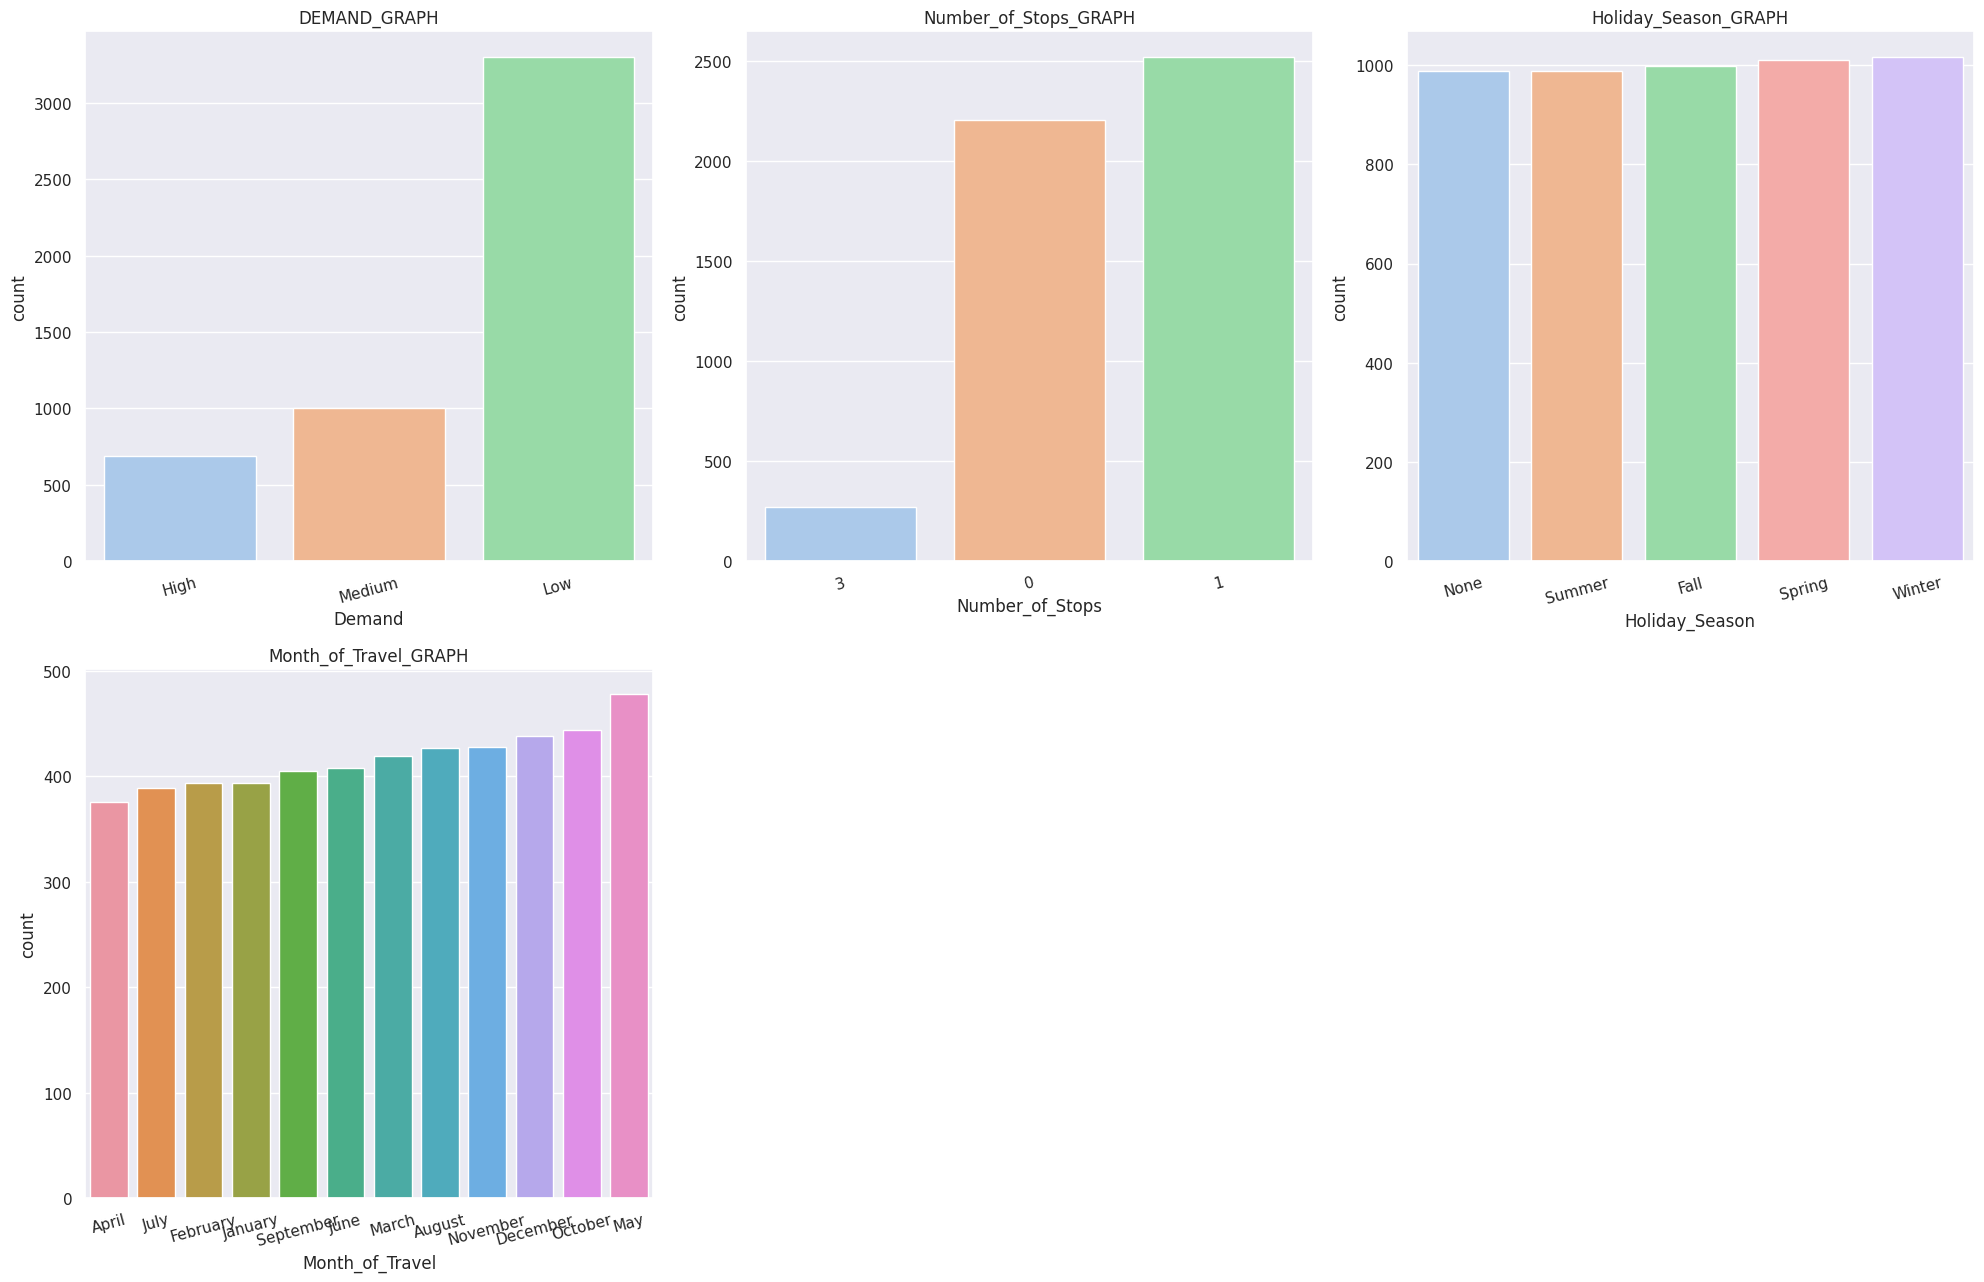

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.countplot(df['Demand'],order=df['Demand'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel
plt.ylabel
plt.title('DEMAND_GRAPH')

plt.subplot(432)
sns.countplot(df['Number_of_Stops'],order=df['Number_of_Stops'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel
plt.ylabel
plt.title('Number_of_Stops_GRAPH')

plt.subplot(433)
sns.countplot(df['Holiday_Season'],order=df['Holiday_Season'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel
plt.ylabel
plt.title('Holiday_Season_GRAPH')

plt.subplot(434)
sns.countplot(df['Month_of_Travel'],order=df['Month_of_Travel'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel
plt.ylabel
plt.title('Month_of_Travel_GRAPH')

plt.tight_layout()

In [ ]:
df = data_train
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Fare"])  # Features
y = df["Fare"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create regression matrices
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
labels = dtrain_reg.get_label()
data = dtrain_reg.get_data()

print("Labels:")
print(labels)
print("\nData:")
print(data)
type(dtrain_reg)

Labels:
[ 7628. 17919. 10513. ... 17458. 16394. 14714.]

Data:
  (0, 0)	4.0
  (0, 1)	0.0
  (0, 2)	1.0
  (0, 3)	21.8333
  (0, 4)	47.0
  (0, 5)	3.0
  (0, 6)	3.0
  (0, 7)	1.0
  (0, 8)	0.0
  (0, 9)	0.0
  (0, 10)	0.0
  (0, 11)	0.0
  (0, 12)	0.0
  (0, 13)	0.0
  (0, 14)	0.0
  (0, 15)	0.0
  (0, 16)	1.0
  (0, 17)	0.0
  (0, 18)	0.0
  (0, 19)	0.0
  (0, 20)	1.0
  (0, 21)	0.0
  (0, 22)	0.0
  (0, 23)	0.0
  (0, 24)	0.0
  :	:
  (361669, 0)	3.0
  (361669, 1)	2.0
  (361669, 2)	1.0
  (361669, 3)	13.6667
  (361669, 4)	25.0
  (361669, 5)	9.0
  (361669, 6)	2.0
  (361669, 7)	0.0
  (361669, 8)	0.0
  (361669, 9)	0.0
  (361669, 10)	0.0
  (361669, 11)	1.0
  (361669, 12)	0.0
  (361669, 13)	0.0
  (361669, 14)	0.0
  (361669, 15)	0.0
  (361669, 16)	0.0
  (361669, 17)	0.0
  (361669, 18)	1.0
  (361669, 19)	0.0
  (361669, 20)	0.0
  (361669, 21)	0.0
  (361669, 22)	1.0
  (361669, 23)	0.0
  (361669, 24)	0.0


xgboost.core.DMatrix

In [ ]:
df['Total_stops'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452088 entries, 0 to 452087
Series name: Total_stops
Non-Null Count   Dtype
--------------   -----
452088 non-null  int64
dtypes: int64(1)
memory usage: 3.4 MB


In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 4600


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=100,
   early_stopping_rounds=100
)

[0]	validation-rmse:15185.10130	train-rmse:15175.06366
[100]	validation-rmse:5943.62211	train-rmse:5888.20824
[200]	validation-rmse:5588.57157	train-rmse:5478.19467
[300]	validation-rmse:5369.37111	train-rmse:5208.33903
[400]	validation-rmse:5230.34440	train-rmse:5030.08303
[500]	validation-rmse:5118.03201	train-rmse:4875.01191
[600]	validation-rmse:5038.75857	train-rmse:4752.11696
[700]	validation-rmse:4981.00958	train-rmse:4657.68346
[800]	validation-rmse:4931.43363	train-rmse:4572.89874
[900]	validation-rmse:4895.78794	train-rmse:4508.10502
[1000]	validation-rmse:4861.97131	train-rmse:4444.09181
[1100]	validation-rmse:4837.03439	train-rmse:4390.32673
[1200]	validation-rmse:4814.52207	train-rmse:4338.17473
[1300]	validation-rmse:4791.93465	train-rmse:4287.02705
[1400]	validation-rmse:4770.08027	train-rmse:4242.41173
[1500]	validation-rmse:4749.15642	train-rmse:4199.46777
[1600]	validation-rmse:4730.93167	train-rmse:4157.32473
[1700]	validation-rmse:4720.75414	train-rmse:4121.78526
[1

In [ ]:
# model.fit(X_train,y_train)

y_pred=model.predict(dtest_reg)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(" Root Mean Squared Error (RMSE):",627.5058588364545)
print(" r2 :", metrics.r2_score(y_test,y_pred))

 Root Mean Squared Error (RMSE): 627.5058588364545
 r2 : 0.9481865420094817


<Axes: xlabel='Fare'>

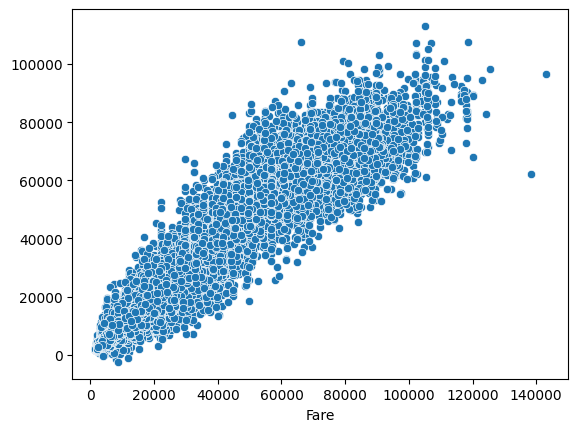

In [ ]:
import seaborn as sns
color_dict = {1:'red', 2:'blue'}
sns.scatterplot(x=y_test, y=y_pred)

In [ ]:
df.to_csv('Encoded.csv', index = False)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Journey_day             452088 non-null  int64  
 1   Class                   452088 non-null  int64  
 2   Total_stops             452088 non-null  int64  
 3   Duration_in_hours       452088 non-null  float64
 4   Days_left               452088 non-null  int64  
 5   Journey_date            452088 non-null  int32  
 6   Journey_month           452088 non-null  int32  
 7   6 AM - 12 PM            452088 non-null  bool   
 8   After 6 PM              452088 non-null  bool   
 9   Before 6 AM             452088 non-null  bool   
 10  Departure_6 AM - 12 PM  452088 non-null  bool   
 11  Departure_After 6 PM    452088 non-null  bool   
 12  Departure_Before 6 AM   452088 non-null  bool   
 13  Source_Bangalore        452088 non-null  bool   
 14  Source_Chennai      

In [ ]:
import joblib
# file = open(, 'wb')
joblib.dump(model, 'flight_xgb.pkl')

['flight_xgb.pkl']

Mean Absolute Error (MAE): 2712.37
Mean Squared Error (MSE): 21381705.97
Root Mean Squared Error (RMSE): 4624.04
R-squared (R2): 0.95


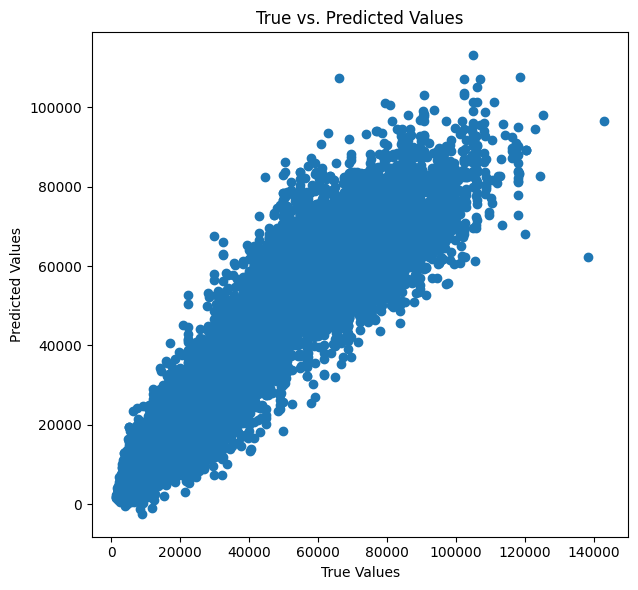

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Fit your machine learning model

# Make predictions on the test se

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create visualizations
plt.figure(figsize=(12, 6))

# Scatter plot of true vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Display performance metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()

# Fit the model to the data
model3.fit(X_train, y_train)

# Make predictions
y_pred2 = model3.predict(X_test)

r2 = r2_score(y_test, y_pred2)
print(r2)

0.19336280805550365
